In [1]:
# import packages and libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import numpy as np
import sys
sys.path.append('../')

# Import Data

In [2]:
# read data
df = pd.read_csv("../data/AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
# evaluate data columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [4]:
# evaluate data statistics
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [5]:
# identify null values
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

# Exploratory Data Analysis (EDA)

Text(0.5, 1.0, 'Price Distribution')

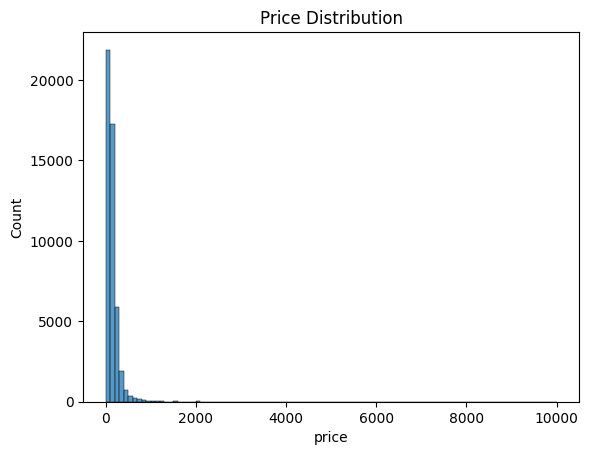

In [6]:
# price distribution with outliers
sns.histplot(df['price'], bins = 100)
plt.title("Price Distribution")

Text(0.5, 1.0, 'Zoomed Price Distribution (Under $500)')

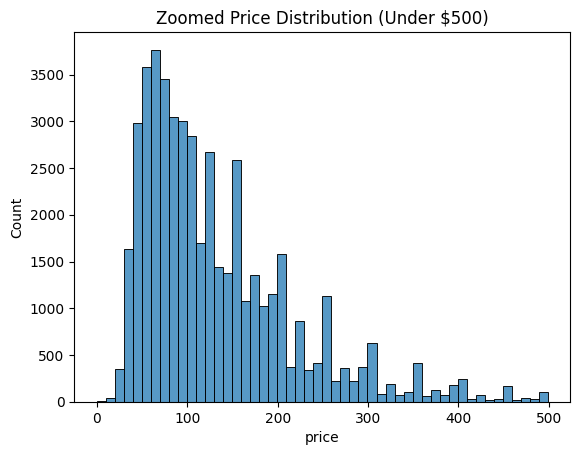

In [7]:
# zoom into price (<$500) to see better distribution
df_zoom = df[df['price'] < 500]
sns.histplot(df_zoom['price'], bins=50)
plt.title("Zoomed Price Distribution (Under $500)")

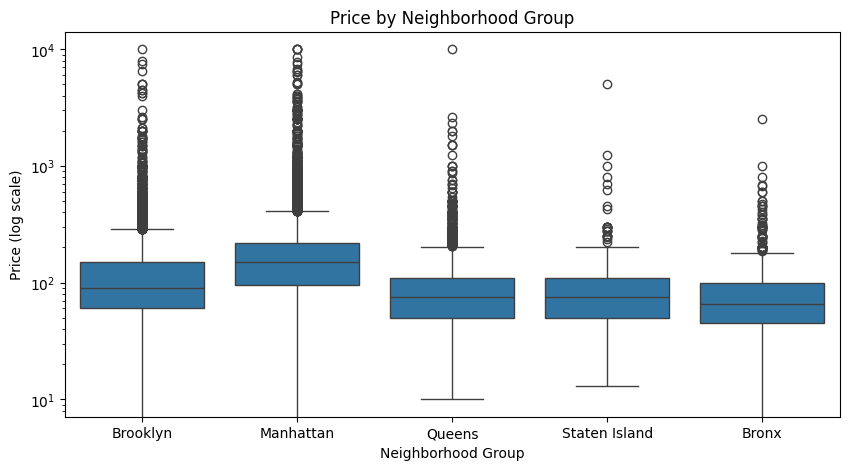

In [8]:
# explore price by neighborhood with outliers
plt.figure(figsize=(10, 5))
sns.boxplot(x='neighbourhood_group', y='price', data=df)
plt.yscale('log')  # Helps visualize outliers while keeping them in
plt.title('Price by Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Price (log scale)')
plt.show()

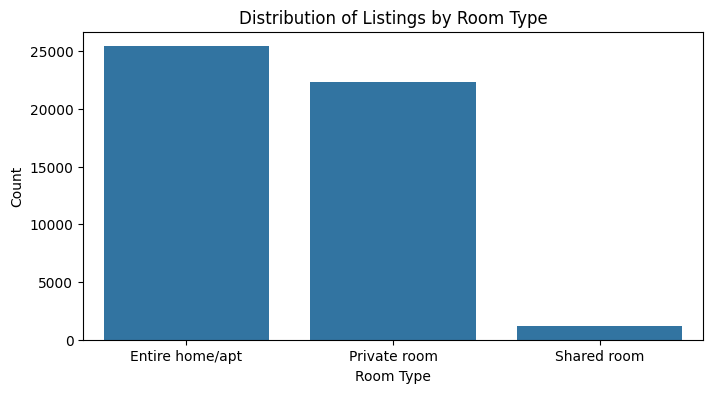

In [9]:
# count of listings by room types
plt.figure(figsize=(8,4))
sns.countplot(x='room_type', data=df, order=df['room_type'].value_counts().index)
plt.title('Distribution of Listings by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

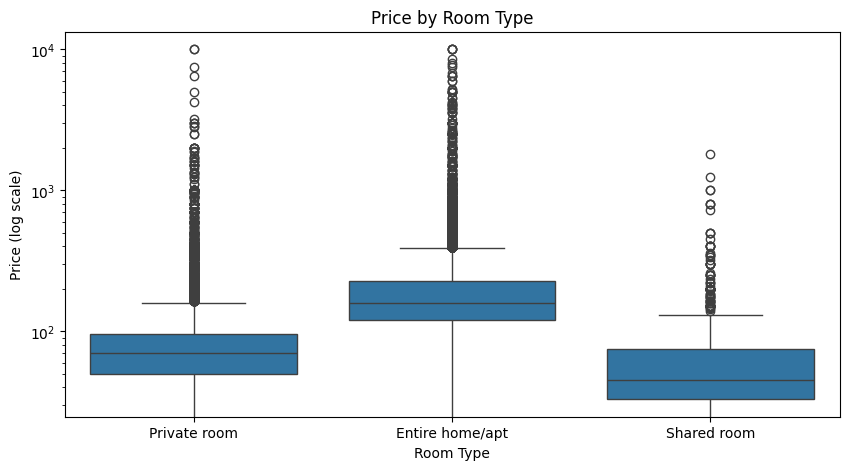

In [10]:
# price distribution by room type
plt.figure(figsize=(10,5))
sns.boxplot(x='room_type', y='price', data=df)
plt.yscale('log')  # Again, helps visualize with outliers
plt.title('Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price (log scale)')
plt.show()

In [11]:
# check how many missing values exist
missing_count = df['reviews_per_month'].isnull().sum()
print(f"Missing reviews_per_month: {missing_count}")

Missing reviews_per_month: 10052


In [12]:
# check percentage of total
percent_missing = missing_count / len(df) * 100
print(f"Percentage missing: {percent_missing:.2f}%")

Percentage missing: 20.56%


In [13]:
# compare rows with and without missing reviews_per_month
missing_rows = df[df['reviews_per_month'].isnull()]
non_missing_rows = df[df['reviews_per_month'].notnull()]

# see if they differ meaningfully in price or other features
print("Mean price (missing reviews):", missing_rows['price'].mean())
print("Mean price (non-missing reviews):", non_missing_rows['price'].mean())


Mean price (missing reviews): 192.9190210903303
Mean price (non-missing reviews): 142.317946605566


# Clean & Transform Data

In [14]:
# import processing function above
from pipeline.preprocess import preprocess_data

# load and clean data
preprocessor, X_train, X_test, y_train, y_test = preprocess_data(df)

# fit and transform the preprocessor
preprocessor.fit(X_train)

# transform the datasets
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# confirm results
print("X_train_transformed shape:", X_train_transformed.shape)
print("X_test_transformed shape:", X_test_transformed.shape)

X_train_transformed shape: (34226, 231)
X_test_transformed shape: (14669, 231)
